#Graph Partitioning
As a graph theory, with even number of nodes V, just divide these nodes to 2groups contains V/2 nodes, minimize the number of edge is graph partitioning

<img src="https://github.com/mdrft/Wildqat/blob/master/examples_ja/img/009_1.png?raw=1">

The first term is the constrain that grouping to 2group, each groups has just V/2 nodes.
The second term is the cost function to minimize the number of connection between 2 groups

##Example
As an example let's think about 1D ring with 8 nodes.

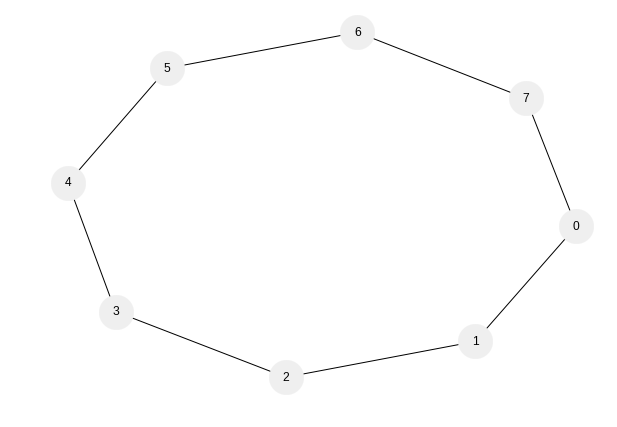

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

options = {'node_color': '#efefef','node_size': 1200,'with_labels':'True'}

G = nx.Graph()
G.add_nodes_from([0,1,2,3,4,5,6,7])
G.add_edges_from([(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,0)])
nx.draw(G, **options)

First we prepare the program

In [0]:
!pip install -U blueqat

In [0]:
import blueqat.wq as wq
a = wq.Opt()

##The first term
The first term is a constraint for groups.
We just prepare diagonal matrix all diagonal element is 1 and multiple itself. Using blueqat's funciton it is easy to create.

In [6]:
matrix1 = wq.sqr([1,1,1,1,1,1,1,1])
print(matrix1)

[[1 2 2 2 2 2 2 2]
 [0 1 2 2 2 2 2 2]
 [0 0 1 2 2 2 2 2]
 [0 0 0 1 2 2 2 2]
 [0 0 0 0 1 2 2 2]
 [0 0 0 0 0 1 2 2]
 [0 0 0 0 0 0 1 2]
 [0 0 0 0 0 0 0 1]]


##The second term
For the second term we use blueqat's function to automatically create network matrix which has connection between nodes in the list.

In [7]:
matrix2 = wq.net([[0,1],[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],[7,0]],8)
print(matrix2)

[[0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [19]:
B = 0.5
a.J = matrix1 - B * matrix2
a.sa()

1.6067297458648682


[1, 0, 0, 0, 0, 1, 1, 1]

In [20]:
a.sa()

1.6462619304656982


[1, 1, 0, 0, 0, 0, 1, 1]

Now we get some solution with correctly has 2 groups and has least connection between groups

In [0]:
print(a.J)

[[1.  2.5 2.  2.  2.  2.  2.  2.5]
 [0.  1.  2.5 2.  2.  2.  2.  2. ]
 [0.  0.  1.  2.5 2.  2.  2.  2. ]
 [0.  0.  0.  1.  2.5 2.  2.  2. ]
 [0.  0.  0.  0.  1.  2.5 2.  2. ]
 [0.  0.  0.  0.  0.  1.  2.5 2. ]
 [0.  0.  0.  0.  0.  0.  1.  2.5]
 [0.  0.  0.  0.  0.  0.  0.  1. ]]
